# Einlesen der Daten und erster Überblick

In [1]:
import pandas as pd
daten = pd.read_csv('d28.csv')  

In [7]:
import matplotlib.pyplot as plt

In [13]:
daten.columns

Index(['Name', 'Energie', 'Fett', 'FS', 'Kohlenhydrate', 'Zucker', 'Eiweiss',
       'Salz', 'Label'],
      dtype='object')

In [101]:
daten.head()

,Name,Energie,Fett,FS,Kohlenhydrate,Zucker,Eiweiss,Salz,Label
0,Apfel,52,0.2,0.0,13.8,11.0,0.3,0.0,1
1,Banane,95,0.3,0.1,21.0,12.0,1.1,0.1,1
2,Haselnussschnitte,542,31.9,18.6,54.0,42.6,7.6,0.4,0
3,Gummibärchen,343,0.1,0.1,77.0,46.0,6.9,0.1,0
4,Chips,503,28.0,2.6,53.0,2.9,6.3,2.8,0


# Visualisiere Abhängigkeit zwischen Label (gesund/ungesund) und Merkmal "Energie"

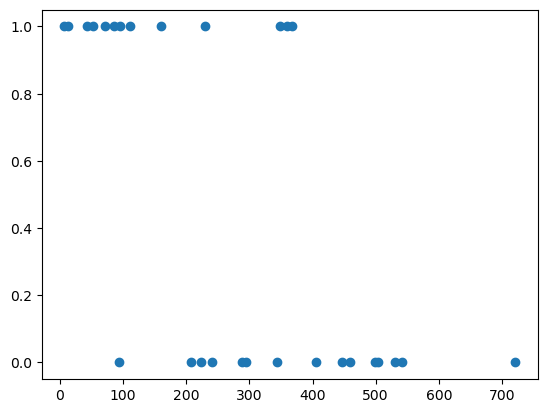

In [43]:
plt.scatter(daten['Energie'], daten['Label'])

# NB: "import plotly" geht nicht in Jupyter-Lite

In [44]:
import plotly.express as px
fig = px.scatter(daten, x='Energie', y='Label', hover_name='Name')
fig.update_layout(scene_zaxis_type="log")
fig.show()

# Visuelle Korrelation der anderen Merkmale mit dem Label

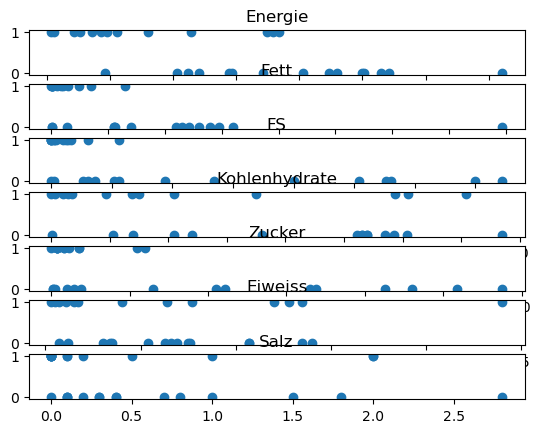

In [37]:
anzahl_merkmale = len(daten.columns)-2
for i in range(1,len(daten.columns)-1):
    plt.subplot(anzahl_merkmale,1,i)
    plt.title(daten.columns[i])
    plt.scatter(daten[daten.columns[i]], zuordnung)
    

# Erstelle lin. Regressionsgerade für Label in Abh.keit von "Energie

In [65]:
import numpy as np

In [103]:
x=np.array(daten['Energie']).reshape((-1,1))
y=np.array(daten['Label'])

In [104]:
from sklearn import datasets, linear_model

In [105]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(x, y)

LinearRegression()

## Regressionskoeffizient (Label<->Energie)

In [106]:
regr.score(x,y)

0.3984499574912118

### Korrelationskoeffizient für die anderen Merkalme

In [99]:
anzahl_merkmale = len(daten.columns)-2
for i in range(1,len(daten.columns)-1):
    print(i, daten.columns[i])
    regr.fit( np.array(daten[daten.columns[i]]).reshape((-1,1)), np.array(daten['Label']) )
    print(regr.score( np.array(daten[daten.columns[i]]).reshape((-1,1)), np.array(daten['Label'])))

1 Energie
0.3984499574912118
2 Fett
0.30368235048046666
3 FS
0.3324662863346797
4 Kohlenhydrate
0.14622398718678908
5 Zucker
0.28960352184681304
6 Eiweiss
8.578922137336686e-05
7 Salz
0.02681901356315719


In Übereinstimmung mit der obigen visuellen Beurteilung ist die Korrelation für die anderen Merkmale ist also noch schlechter. Für Eiweiss gibt es praktisch keine Korrelation zum Label.

# Vorhersage mit Reg.gerade (Label<->Energie)

In [84]:
y_pred = regr.predict(x)

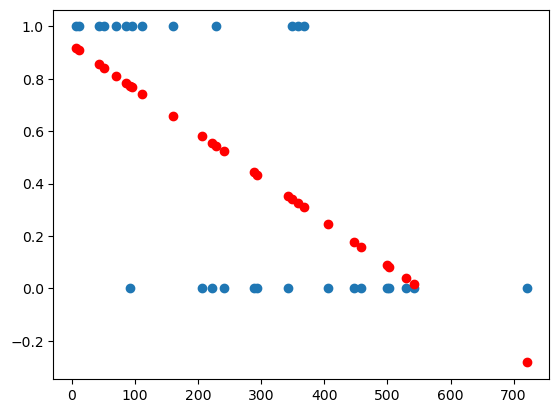

In [90]:
plt.scatter(daten['Energie'], daten['Label'])
plt.scatter(x,y_pred, color="red")

# Split in Trainigs- und Testdaten

In [137]:
len(daten)

28

In [143]:
daten.head()

,Name,Energie,Fett,FS,Kohlenhydrate,Zucker,Eiweiss,Salz,Label
0,Apfel,52,0.2,0.0,13.8,11.0,0.3,0.0,1
1,Banane,95,0.3,0.1,21.0,12.0,1.1,0.1,1
2,Haselnussschnitte,542,31.9,18.6,54.0,42.6,7.6,0.4,0
3,Gummibärchen,343,0.1,0.1,77.0,46.0,6.9,0.1,0
4,Chips,503,28.0,2.6,53.0,2.9,6.3,2.8,0


In [108]:
x=np.array(daten['Energie']).reshape((-1,1))
y=np.array(daten['Label'])

In [130]:
print( random.shuffle( list(range(28)) ) )

None


# Erstellen der Splits in Trainings- und Testdaten
20 Datensätze als Trainingsdaten, 8 als Testdaten

In [135]:
import random
rand_ind = list(range(28))
random.shuffle( rand_ind )
print( rand_ind )

[15, 5, 6, 22, 14, 27, 4, 0, 8, 19, 10, 12, 13, 2, 1, 26, 9, 23, 11, 25, 20, 16, 7, 24, 21, 3, 17, 18]


In [152]:
training_ind = rand_ind[0:20]
test_ind     = rand_ind[20:28]
daten_training = daten.loc[training_ind]
daten_test     = daten.loc[test_ind]

Umwandlung DataFrame in Array

In [159]:
x_training = np.array(daten_training['Energie']).reshape((-1,1))
y_training = np.array(daten_training['Label'])

In [164]:
x_test = np.array(daten_test['Energie']).reshape((-1,1))
y_test = np.array(daten_test['Label'])

## Berechne Vorhersage für die Testdaten mittels lin. Regr.

In [160]:
regr = linear_model.LinearRegression()
regr.fit(x_training, y_training)
regr.score(x_training, y_training)

0.4439314908175732

In [165]:
y_pred = regr.predict(x_test)

## Vergleiche Vorhersage visuell mit den Labels der Testdaten

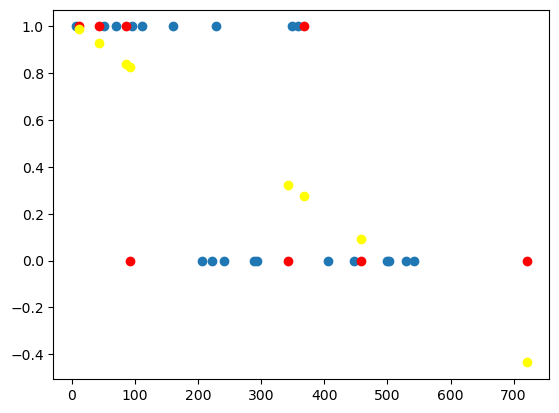

In [170]:
plt.scatter(x_training, y_training)
plt.scatter(x_test, y_test, color ="red")
plt.scatter(x_test,y_pred, color="yellow")